In [4]:
from WF_SDK import device       # import instruments

# connect to the device
device_data = device.open(device = "Analog Discovery 2") # open the connection
 
# close the connection
device.close(device_data)

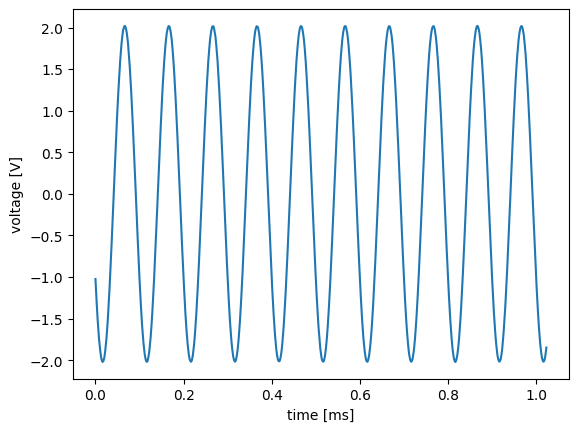

In [2]:
from WF_SDK import device, scope, wavegen   # import instruments
 
import matplotlib.pyplot as plt   # needed for plotting
 
"""-----------------------------------------------------------------------"""
 
# connect to the device
device_data = device.open(device = "Analog Discovery 2") # open the connection
 
"""-----------------------------------"""
 
# initialize the scope with default settings
scope.open(device_data, sampling_frequency=1e06, buffer_size=1024)
 
# generate a 10KHz sine signal with 2V amplitude on channel 1
wavegen.generate(device_data, channel=1, function=wavegen.function.sine, offset=0, frequency=10e03, amplitude=2)
 
# record data with the scopeon channel 1
buffer= scope.record(device_data, channel=1)
time = range(0, scope.data.buffer_size)

time = [moment / scope.data.sampling_frequency for moment in time]
time = [moment * 1e03 for moment in time]
 
# print(buffer)
# print(type(buffer))
 
# plot
#time = [moment * 1e03 for moment in time]   # convert time to ms
plt.plot(time, buffer)
plt.xlabel("time [ms]")
plt.ylabel("voltage [V]")
plt.show()
 
# reset the scope
scope.close(device_data)
 
# reset the wavegen
wavegen.close(device_data)
 
"""-----------------------------------"""
 
# close the connection
device.close(device_data)

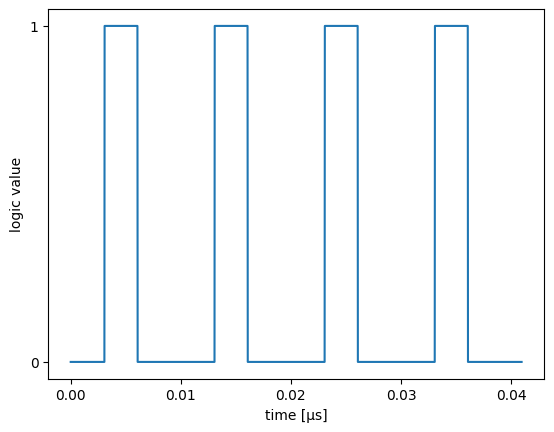

In [1]:
from WF_SDK import device, logic, pattern, logic   # import instruments
 
import matplotlib.pyplot as plt   # needed for plotting


 
"""-----------------------------------------------------------------------"""
 
# connect to the device
device_data = device.open()
 
"""-----------------------------------"""
 
# initialize the logic analyzer with default settings
logic.open(device_data)
 
# generate a 100KHz PWM signal with 30% duty cycle on DIO0
pattern.generate(device_data, channel=0, function=pattern.function.pulse, frequency=100e03, duty_cycle=30)

pattern.generate(device_data, channel = 1, function= function.rampup)
# record a logic signal on DIO0
buffer= logic.record(device_data, channel=0)
 
time = range(0, logic.data.buffer_size)

time = [moment / logic.data.sampling_frequency for moment in time]
time = [moment * 1e03 for moment in time]
  # convert time to μs
plt.plot(time, buffer)
plt.xlabel("time [μs]")
plt.ylabel("logic value")
plt.yticks([0, 1])
plt.show()
 
# reset the logic analyzer
logic.close(device_data)
 
# reset the pattern generator
pattern.close(device_data)
 
"""-----------------------------------"""
 
# close the connection
device.close(device_data)

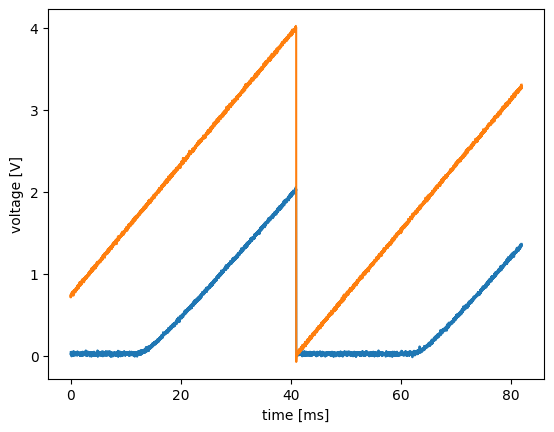

In [2]:
from WF_SDK import device, scope, wavegen, tools, error   # import instruments

import matplotlib.pyplot as plt   # needed for plotting
from time import sleep            # needed for delays

"""-----------------------------------------------------------------------"""

# connect to the device
device_data = device.open(device = "Analog Discovery 2")

"""-----------------------------------"""

# handle devices without analog I/O channels

# initialize the scope with default settings
scope.open(device_data, sampling_frequency=10e4, amplitude_range=10)#, buffer_size=1024, sampling_frequency=100

# set up triggering on scope channel 1
scope.trigger(device_data, enable=True, source=scope.trigger_source.analog, channel=1, level=0)
scope.trigger(device_data, enable=True, source=scope.trigger_source.analog, channel=2, level=0)

# generate a 10KHz sine signal with 2V amplitude on channel 1
wavegen.generate(device_data, channel=1, function=wavegen.function.ramp_up, symmetry=100, offset=2, frequency=20, amplitude=2)

sleep(3)    # wait 1 second

# record data with the scopeon channel 1
buffer = scope.record(device_data, channel=1)
buffer_2 = scope.record(device_data, channel=2)

# generate buffer for time moments
time = []
for index in range(len(buffer)):
    time.append(index * 1e03 / scope.data.sampling_frequency)   # convert time to ms

# plot
plt.plot(time, buffer)
plt.xlabel("time [ms]")
plt.ylabel("voltage [V]")


plt.plot(time, buffer_2)
plt.xlabel("time [ms]")
plt.ylabel("voltage [V]")


plt.show()

# reset the scope
scope.close(device_data)

# reset the wavegen
wavegen.close(device_data)

device.close(device_data)